# Cotton Disease Dataset

The  dataset is available on Kaggle : ' https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset '

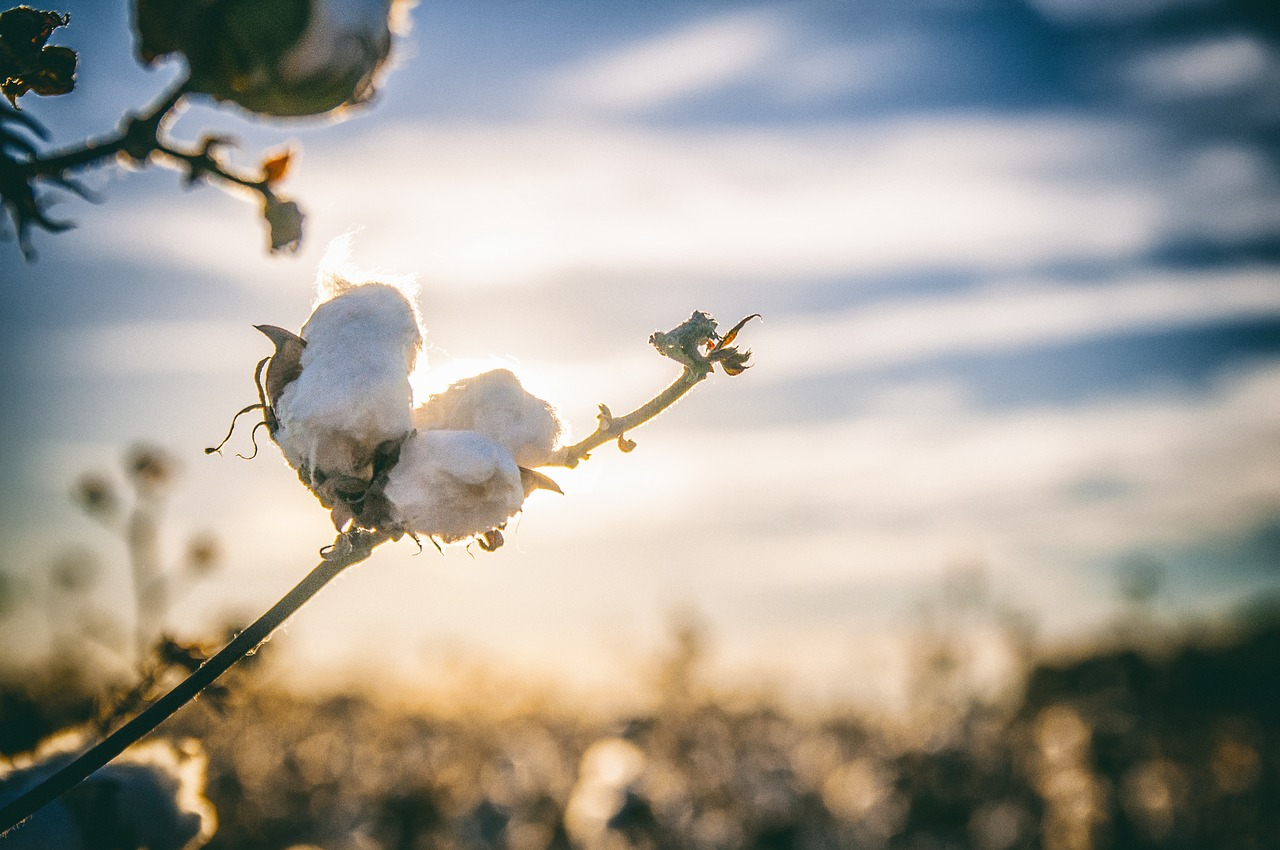

In [1]:
# importing of Libraries

import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for Normalizing our images

In [2]:
tf.__version__ # Tensorflow version being used.

'2.3.1'

In [3]:
'''Normalizing our dataset and creating more images by fliping images horizontally and 
vertically. '''

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range=0.2,
                                  horizontal_flip=True,vertical_flip=True)


In [4]:
''' providing path to our train, test, val and deciding our batch size as our test data 
is multi categorical so in class mode we have used categorical.
'''

trainSet = train_datagen.flow_from_directory('Dataset/train',
                                            target_size=(100,100),
                                            batch_size=32,
                                            class_mode ="categorical" )

# by dividing by 255 we are normalzing our image and making its range from 0 to 1.

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

validSet = valid_datagen.flow_from_directory('Dataset/val',
                                            target_size=(100,100),
                                            batch_size=32,
                                            class_mode="categorical")

testSet = test_datagen.flow_from_directory('Dataset/test',
                                            target_size=(100,100),
                                            batch_size=32,
                                            class_mode="categorical")

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [5]:
# creating a SEQUENTIAL MODEL

cnn_cotton = tf.keras.models.Sequential() 


'''adding layers having filter and kernel size also here we are
using padding so that the size of original image remains same
activation function being used here RELU and for output layer as it is 
multi - categorical we are using SOFTMAX'''

cnn_cotton.add(tf.keras.layers.Conv2D(filters=32,
                                     padding="same",kernel_size=3,
                                     activation="relu",input_shape=[100,100,3]))


cnn_cotton.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_cotton.add(tf.keras.layers.Conv2D(filters=32,
                                     padding="same",kernel_size=3,
                                     activation="relu"))

cnn_cotton.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_cotton.add(tf.keras.layers.Conv2D(filters=32,
                                     padding="same",kernel_size=3,
                                     activation="relu"))

cnn_cotton.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_cotton.add(tf.keras.layers.Flatten())

cnn_cotton.add(tf.keras.layers.Dense(units = 200,activation="relu"))

cnn_cotton.add(tf.keras.layers.Dense(units = 4,
                                     activation='softmax'))

In [6]:
cnn_cotton.summary() # Summary of our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [8]:
# Comppiling and fitting our dataset for 30 EPOCHS.

cnn_cotton.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=["accuracy"])

history = cnn_cotton.fit(x=trainSet,validation_data = testSet,epochs = 30)
history

Epoch 1/30
61/61 [==============================] - 33s 546ms/step - loss: 0.4978 - accuracy: 0.8180 - val_loss: 0.5519 - val_accuracy: 0.8019
Epoch 2/30
61/61 [==============================] - 32s 526ms/step - loss: 0.4429 - accuracy: 0.8309 - val_loss: 0.4861 - val_accuracy: 0.8302
Epoch 3/30
61/61 [==============================] - 32s 527ms/step - loss: 0.3842 - accuracy: 0.8452 - val_loss: 0.6841 - val_accuracy: 0.7925
Epoch 4/30
61/61 [==============================] - 32s 524ms/step - loss: 0.3732 - accuracy: 0.8529 - val_loss: 0.4301 - val_accuracy: 0.8396
Epoch 5/30
61/61 [==============================] - 32s 526ms/step - loss: 0.3215 - accuracy: 0.8703 - val_loss: 0.4419 - val_accuracy: 0.8585
Epoch 6/30
61/61 [==============================] - 32s 524ms/step - loss: 0.2954 - accuracy: 0.8883 - val_loss: 0.4470 - val_accuracy: 0.8208
Epoch 7/30
61/61 [==============================] - 32s 531ms/step - loss: 0.2915 - accuracy: 0.8872 - val_loss: 0.5423 - val_accuracy: 0.8396

In [9]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 61}

In [10]:
pd.DataFrame(history.history)

<IPython.core.display.Javascript object>

,loss,accuracy,val_loss,val_accuracy
0,0.497764,0.818042,0.551946,0.801887
1,0.442878,0.830856,0.486148,0.830189
2,0.384168,0.845208,0.684104,0.792453
3,0.373204,0.852896,0.430148,0.839623
4,0.321513,0.870323,0.441894,0.858491
5,0.295405,0.888262,0.447043,0.820755
6,0.291457,0.887237,0.542266,0.839623
7,0.269295,0.888262,0.280958,0.877358
8,0.292890,0.888775,0.418988,0.830189
9,0.251120,0.898001,0.343842,0.905660


<IPython.core.display.Javascript object>

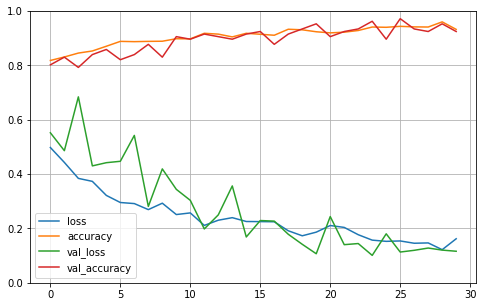

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [13]:
# predicting our result on image 'd (76)_iaip - Copy.jpg' which belongs to fresh_leaf class


test_img = image.load_img('Dataset/test/fresh cotton leaf/d (76)_iaip - Copy.jpg',
                          target_size=(100,100))

test_img = image.img_to_array(test_img)

test_img = test_img/255

test_img = np.expand_dims(test_img, axis = 0)

result = cnn_cotton.predict(test_img)


In [ ]:
result

In [ ]:
result = result.ravel() # Flattened array having same type as the Input array and and order as per choice. 

In [ ]:
print("Largest element is: ", max(result))


In [ ]:
result.sort()
result

In [ ]:
result=result.tolist()

In [ ]:
result1=["diseased_leaf","diseased_plant","freash_leaf","freash_plant"]
max = result[0]

for i in range(0, len(result)):
    if(result[i]>max):
        max = result[i];
        
print("\nLargest element present in given array: " + 
     str(max) + "And it belongs to " +str(result1[2]) + " class")